# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Christian, miri**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Tweet Classification Challenge

<!-- The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.  -->

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import re
sns.set()
import wordcloud
from wordcloud import WordCloud
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import string
from collections import Counter
import collections
import plotly.graph_objs as go
# Libraries for data preparation and model building
from sklearn.metrics import classification_report

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = ' '

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

In [2]:
# load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


lets comfirm the various data types as well as check if the data contains missing values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [6]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

no missing values
lets proceed to see the size of our data


In [7]:
df_train.shape

(15819, 3)

We'll print off a list of all the sentiment types which are present in this dataset.

In [8]:
type_Sentiments = list(df_train.sentiment.unique())
print(type_Sentiments)

[1, 2, 0, -1]


Let's have a look at how many data samples we have for each of the different sentiment types.

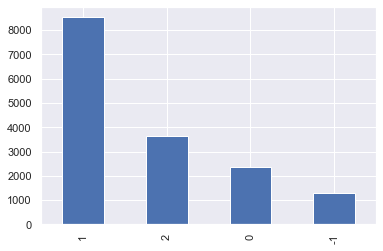

In [9]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

there is obviously an imbalance in the various classes.


In [10]:
category_news = df_train[df_train['sentiment']==2]
category_pro =  df_train[df_train['sentiment']==1]
category_neutral =  df_train[df_train['sentiment']==0]
category_anti =  df_train[df_train['sentiment']==-1]

lets view a count of words for each category

In [11]:
wordcount_per_cat = df_train.groupby('sentiment').count()['tweetid'].reset_index().sort_values(by='tweetid',ascending=False)
wordcount_per_cat.style.background_gradient(cmap='YlGnBu')

,sentiment,tweetid
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


lets visualize the data distribution by category name for more clarity

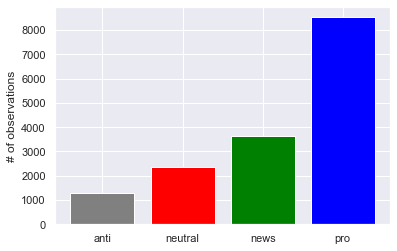

In [12]:
labels = df_train['sentiment'].unique()
heights = [len(category_news),len(category_pro), len(category_neutral), len(category_anti)]
plt.bar(labels,heights,color=['green','blue','red', 'grey'])
plt.xticks(labels,['news','pro','neutral','anti'])
plt.ylabel("# of observations")
plt.show()

we see that those belonging to "pro" category acount for a much part of the distribution compared to the rest
lets see the percentage distribution of category pro

In [13]:
# Percentage of tweets that support the belief of man-made climate change category in the dataset 
len(category_pro)/(len(df_train))

0.5392249826158417

category pro accounts for about half of the distribution,
we are going to have to balance the data in feature engineering

lets use a wordcloud to check the most occuring words before preprocessing the data
we dont expect it to be perfect now because there are a lot of superflous data we may need to do away with during preprocessing


In [14]:
text = str(df_train['message'])

In [15]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

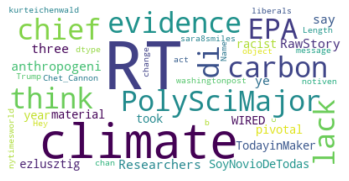

In [16]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

the image obviously contains some stopwords and unwanted info that doesnt give us any insight.
we will preprocess the data and visualize the wordcloud afterwards and see if we get vital insights.

lets visualize a wordcloud for each of the categories to check if we can see words that are related to thier stated positions

In [17]:
# evaluate correlation
df_train.corr()

,sentiment,tweetid
sentiment,1.000000,-0.003758
tweetid,-0.003758,1.000000


this being a categorical data, no much insight can be gotten from correlation analysis

lets visualize a wordcloud for each category to check if we can see thier most commonly used words before feature engineering

In [18]:
def plot_wordcloud(message, mask=None, max_words=200, max_font_size=100, figure_size=(8,8), color = 'white',
                   title = None, title_size=40, image_color=False):
  
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(message))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

## for category pro

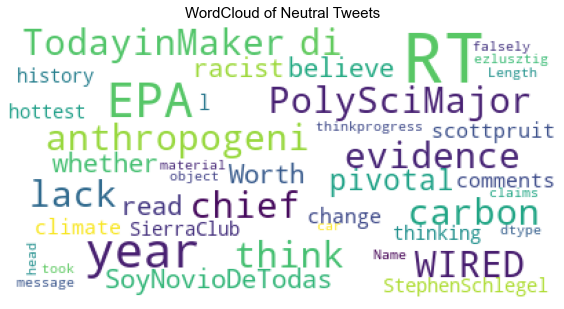

In [19]:
from PIL import Image
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(category_pro.message,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Neutral Tweets")

## for category anti

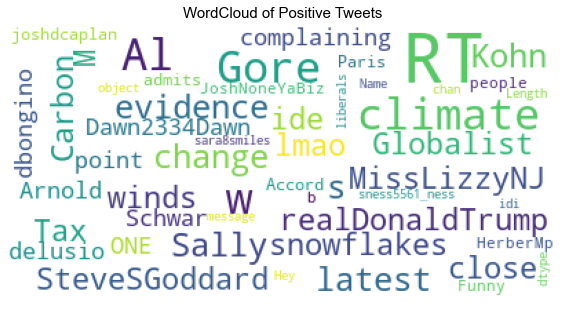

In [20]:
from PIL import Image
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(category_anti.message,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Positive Tweets")

## for category neutral

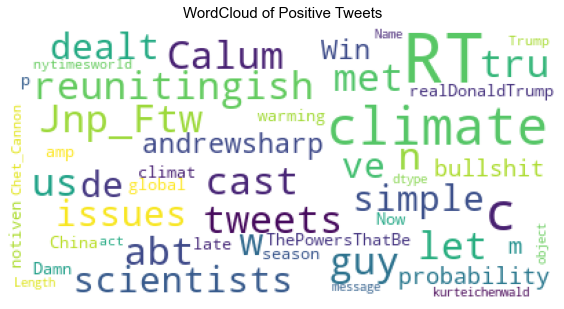

In [21]:
from PIL import Image
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(category_neutral.message,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Positive Tweets")

we can see there are a lot of superflous and unwanted words in our wordcloud
we will visualize another word cloud after removing these unwanted words 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## Data cleaning
lets first clean the messages by converting urls to reflect web url as a word,
then proceed to remove characters

In [22]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [23]:
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [24]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


then we make all the text lower case to remove some noise from capitalisation.

In [25]:
df_train['message'] = df_train['message'].str.lower()
df_test['message'] = df_test['message'].str.lower()

Now let's remove the punctuation using the string import.

In [26]:
import string

In [27]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [28]:
df_train['message'] = df_train['message'].apply(remove_punctuation)
print(df_train['message'].iloc[2611])
df_test['message'] = df_test['message'].apply(remove_punctuation)

good night except to people who still dont believe in climate change


In [29]:
df_train.head(20)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
5,1,worth a read whether you do or dont believe in...,425577
6,1,rt thenation mike pence doesn’t believe in glo...,294933
7,1,rt makeandmendlife six big things we can all d...,992717
8,1,aceofspadeshq my 8yo nephew is inconsolable he...,664510
9,1,rt paigetweedy no offense… but like… how do yo...,260471


we use a fuction to remove more characters

In [30]:
def clean_text(text):
    ''' remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
   
    text = re.sub('RT[\s]+', '', text) # remove retweet 'RT'
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [31]:
df_train['cleaned'] = df_train['message'].apply(lambda x:clean_text(x))

In [32]:
df_test['cleaned'] = df_test['message'].apply(lambda x:clean_text(x))

In [33]:
df_train.head(10)

,sentiment,message,tweetid,cleaned
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,its not like we lack evidence of anthropogenic...
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researchers say we have three year...
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,todayinmaker wired was a pivotal year in the...
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,rt soynoviodetodas its and a racist sexist cl...
5,1,worth a read whether you do or dont believe in...,425577,worth a read whether you do or dont believe in...
6,1,rt thenation mike pence doesn’t believe in glo...,294933,rt thenation mike pence doesn’t believe in glo...
7,1,rt makeandmendlife six big things we can all d...,992717,rt makeandmendlife six big things we can all d...
8,1,aceofspadeshq my 8yo nephew is inconsolable he...,664510,aceofspadeshq my nephew is inconsolable he wa...
9,1,rt paigetweedy no offense… but like… how do yo...,260471,rt paigetweedy no offense… but like… how do yo...


A common occuring word 'rt' reflects a lot in our data as we also see in the word cloud above in EDA,
lets get rid of it as it doesnt give any meaningful insight to our problem

In [34]:
def cleanrt(text):
    text = re.sub(r'rt[\s]+', '', text)
    return text

In [35]:
df_train['cleaned'] = df_train['message'].apply(lambda x:cleanrt(x))

In [ ]:
df_train.head()

lets check our wordcloud now without stopwords for two categories to see if there are changes

In [ ]:
def plot_wordcloud(message, mask=None, max_words=200, max_font_size=100, figure_size=(8,8), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(message))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

In [ ]:
category_news = df_train[df_train['sentiment']==2]
category_pro =  df_train[df_train['sentiment']==1]
category_neutral =  df_train[df_train['sentiment']==0]
category_anti =  df_train[df_train['sentiment']==-1]

## for category pro

In [ ]:
from PIL import Image
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(category_pro.cleaned,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Neutral Tweets")

## for category anti

In [ ]:
from PIL import Image
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(category_anti.cleaned,color='white',max_font_size=50,
               title_size=15,title="WordCloud of Neutral Tweets")

In [ ]:
text = str(df_train[df_train['sentiment'] == 1])

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text Preprocessing
Spelling corections
Converting to lowercase
Remove special characters
Remove stopwords/ urls

In [ ]:
from string import punctuation
print("DATA CLEANING -- \n")
# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def replace_emojis(t):
  '''
  This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
  '''
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

  words = t.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t


def replace_smileys(t):
  '''
  This function replaces happy smileys with "happy" and sad smileys with "sad.
  '''
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

  words = t.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

def replace_contractions(t):
  '''
  This function replaces english lanuage contractions like "shouldn't" with "should not"
  '''
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
  words = t.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

def remove_single_letter_words(t):
  '''
  This function removes words that are single characters
  '''
  words = t.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

print("Cleaning the tweets from the data.\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

def dataclean(t):
  '''
  This function cleans the tweets.
  '''
  t = replace_smileys(t) # replace handwritten emojis with their feeling associated
  t = t.lower() # convert to lowercase
  t = replace_contractions(t) # replace short forms used in english  with their actual words
  t = replace_emojis(t) # replace unicode emojis with their feeling associated
  t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
  t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
  t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
  t = re.sub('#', '', t) # remove '#'
  t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
  t = re.sub('@[^\s]+', '', t) # remove usernames
  t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
  t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
  t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
  t = t.replace('\\\\', '')
  t = t.replace('\\', '')
  t = remove_single_letter_words(t) # removes single letter words
  return t

df_train['cleaned_tweet'] = df_train['message'].apply(dataclean)
print("Tweets have been cleaned.")
df_test['cleaned_tweet'] = df_test['message'].apply(dataclean)

In [44]:
df_train.head()

,sentiment,message,tweetid,cleaned
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,its not like we lack evidence of anthropogenic...
2,2,rt rawstory researchers say we have three year...,698562,rawstory researchers say we have three years t...
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,todayinmaker wired 2016 was a pivotal year in...
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,soynoviodetodas its 2016 and a racist sexist c...


In [45]:
df_test.head()

,message,tweetid,cleaned
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,the scary unimpeachable evidence that climate ...,224985,the scary unimpeachable evidence that climate ...
3,karoli morgfair osborneink dailykos \nputin go...,476263,karoli morgfair osborneink dailykos putin got ...
4,rt fakewillmoore female orgasms cause global w...,872928,rt fakewillmoore female orgasms cause global w...


In [46]:
df_trainc = df_train.copy()

In [47]:
df_test2 = df_test.copy()

Transforming text into numbers
1. Features

Before we can feed our data into our machine learning model, we need to first transform the text into numbers. One common method well suited for this task is Count Vectorization. We can apply this method using Sklearn as follows:

we create a copy of the data before splitting to allow us reserve the original copy incase we want to twaek and make changes later.

we use the countvectorizer to convert our data to numbers

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [39]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [49]:
vect_20_1st = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 1), tokenizer=LemmaTokenizer(),  strip_accents='unicode', max_df=0.5)
X_count_1st1 = vect_20_1st.fit_transform(df_trainc['cleaned'].values.astype(str))

C:\Users\MIRI\anaconda3_\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [50]:
vect_20_test = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 1), tokenizer=LemmaTokenizer(),  strip_accents='unicode', max_df=0.5)
X_count_test= vect_20_test.fit_transform(df_test2['cleaned'].values.astype(str))

### deal with class imbalance

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
X_bal = X_count_1st1

In [53]:
X = X_count_1st1.toarray()

In [54]:
X_test_set = X_count_test.toarray()

In [56]:
# Fit label encoder and return encoded labels
y = le.fit_transform(df_trainc['sentiment'])

In [57]:
type_labels = list(le.classes_)

In [58]:
type_labels

[-1, 0, 1, 2]

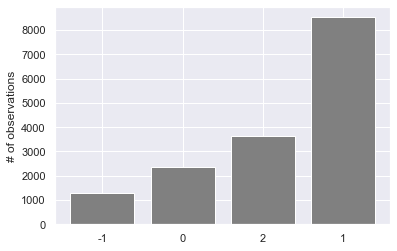

In [59]:
heights = [len(y[y == label]) for label in range(len(type_labels))]
bars = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars = bars.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.show()

In [60]:
# Let's pick a class size of roughly half the size of the largest size
class_size = 4000

In [61]:
# Before resampling, let's stitch our features and labels together
data = np.concatenate([X, y[:,np.newaxis]], axis=1)

In [62]:
bar_label_df = bars.set_index('labels')

In [63]:
from sklearn.utils import resample

In [64]:
resampled_classes = []

# For each label
for label in range(len(type_labels)):
    # Get num. of observations from this class
    label_size = bar_label_df.loc[label]['heights']
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [65]:
resampled_data = np.concatenate(resampled_classes, axis=0)

In [66]:
resampled_data.shape

(16000, 21)

In [67]:
resampled_data[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [68]:
resampled_data 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

In [69]:
X_resampled = resampled_data[:,:-1]

In [70]:
y_resampled = resampled_data[:,-1]

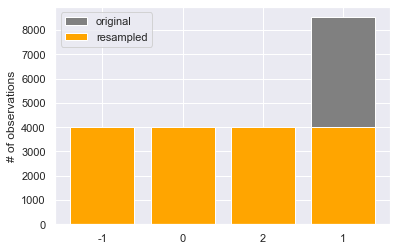

In [71]:
heights = [len(y_resampled[y_resampled == label]) for label in range(len(type_labels))]
bars_resampled = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars_resampled = bars_resampled.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.bar(range(len(bars_resampled)),bars_resampled['heights'],color='orange')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [72]:
# Setting up the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27)

In [73]:
# Training the logistic regression model on our rebalanced data
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [74]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [75]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.41      0.31      0.35       788
           1       0.44      0.46      0.45       803
           2       0.50      0.31      0.38       836
           3       0.51      0.83      0.64       773

    accuracy                           0.47      3200
   macro avg       0.47      0.48      0.45      3200
weighted avg       0.47      0.47      0.45      3200



lets instantiate our countvectorizer and set some of the parameters

first for the 'cleaned' column(without 'rt')

and then for the 'cleaned_tweet' column(with 'rt')

In [81]:
y_pred_test = logreg.predict(X_test_set)

In [82]:
y_pred_test.shape

(10546,)

In [102]:
df_test2['sentiment'] = y_pred_test
# create a df for submission
df_subreg = df_test2[['tweetid', 'sentiment']]

# save to csv
df_subreg.to_csv('logisticregressionsub.csv', header = True, index = False)

### svm

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [84]:
parameters = {'kernel':('linear', 'rbf'), 
              'C':(0.25,1.0),
              'gamma': (1,2)}

In [270]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.25, 1.0), 'gamma': (1, 2),
                         'kernel': ('linear', 'rbf')})

In [271]:
y_opt = clf.predict(X_test)
print("The accuracy for our tuned model is: ", accuracy_score(y_test, y_opt))

The accuracy for our tuned model is:  0.5103125


### Random forest classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
pred_forest = forest.predict(X_test)

In [91]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.55      0.42      0.48       788
           1       0.50      0.52      0.51       803
           2       0.53      0.37      0.44       836
           3       0.54      0.83      0.66       773

    accuracy                           0.53      3200
   macro avg       0.53      0.53      0.52      3200
weighted avg       0.53      0.53      0.52      3200



In [94]:
pred_forest_test = forest.predict(X_test_set)

In [97]:
pred_forest_test.shape

(10546,)

add predicted result to test set for submission 

In [100]:
df_test2['sentiment'] = pred_forest_test

# create a df for submission
df_sub = df_test2[['tweetid', 'sentiment']]

# save to csv
df_sub.to_csv('randomforrest.csv', header = True, index = False)

### Random forest Grid search

In [285]:
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.45046875 0.44984375 0.45007812 0.49578125 0.49765625 0.49679687
 0.50992188 0.511875   0.51226562], using {'max_depth': 16, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.345519,0.135149,0.026176,0.001121,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.447266,0.451562,0.451172,0.449609,0.452734,0.450469,0.001888,7
1,0.558979,0.024306,0.057147,0.011787,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.448828,0.450391,0.451953,0.447266,0.450781,0.449844,0.001631,9
2,1.289897,0.227002,0.108199,0.005541,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.446875,0.450391,0.450000,0.452344,0.450781,0.450078,0.001788,8
3,0.454876,0.040694,0.037265,0.001535,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.488672,0.492578,0.488281,0.505078,0.504297,0.495781,0.007430,6
4,0.848009,0.024660,0.074631,0.002500,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.491016,0.497266,0.493359,0.505859,0.500781,0.497656,0.005287,4
5,2.040698,0.351192,0.170641,0.019500,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.489844,0.495703,0.492578,0.503125,0.502734,0.496797,0.005341,5
6,0.634609,0.031004,0.054749,0.001434,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.505469,0.509375,0.505469,0.515625,0.513672,0.509922,0.004160,3
7,1.353338,0.218635,0.120288,0.031141,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.506250,0.514453,0.507031,0.517188,0.514453,0.511875,0.004396,2
8,3.073334,0.250325,0.280040,0.047156,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.509375,0.515625,0.505859,0.515234,0.515234,0.512266,0.003957,1


In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

lets begin with a logistic regression for both X-1 and X_2 features we created in feature engineering and see which performs best.

whether X_1(without 'rt') or

X_2(with 'rt')

this is to help establish if retweeting plays a role in determining which class an observation falls into

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic